Running single qubit test...


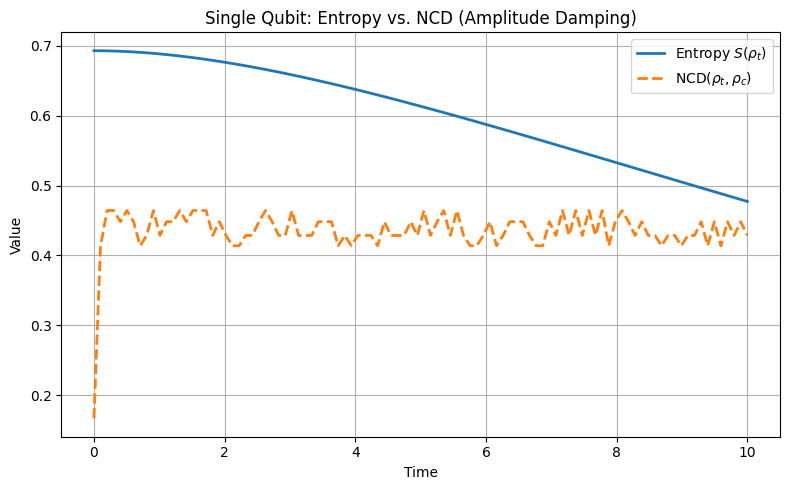

Running Bell state test...


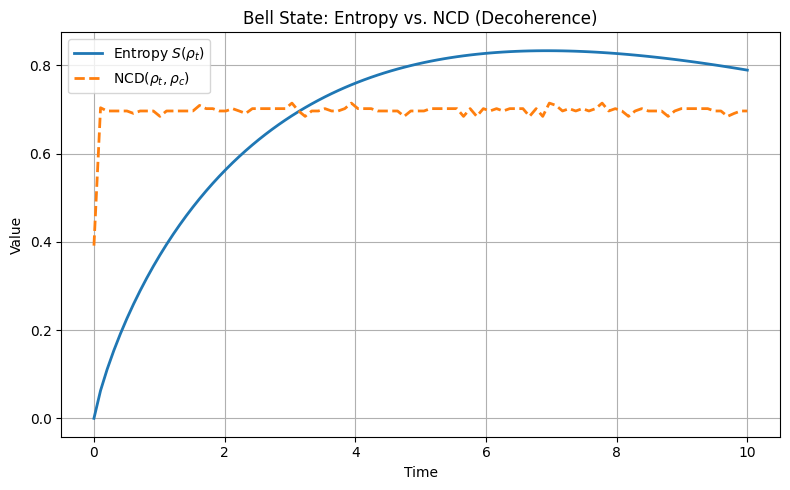

Running interacting qubits test...


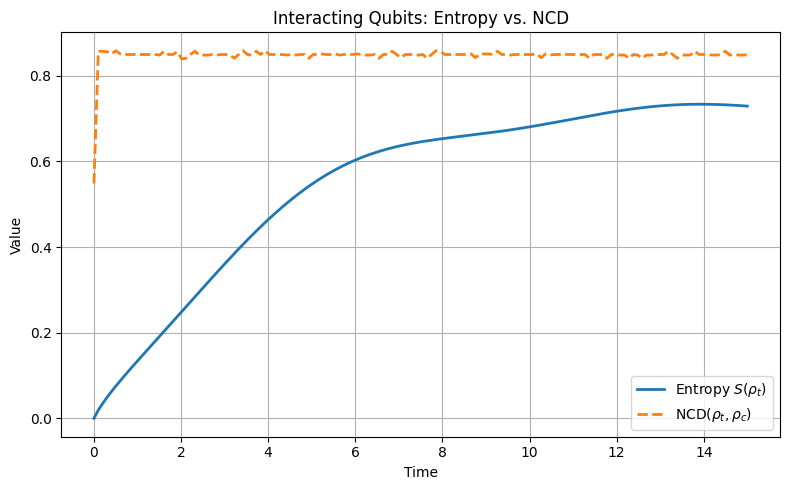

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import zlib
from qutip import *

# Helper: Von Neumann Entropy
def vn_entropy(rho):
    return entropy_vn(rho)

# Helper: NCD using zlib compression
def ncd(rho, ref_rho):
    def compress(matrix):
        return len(zlib.compress(matrix.full().tobytes()))
    Cx = compress(rho)
    Cy = compress(ref_rho)
    Cxy = compress((rho + ref_rho) / 2)
    return (Cxy - min(Cx, Cy)) / max(Cx, Cy)

# ------------------------------
# 1. Single Qubit Damping Test
# ------------------------------
def run_single_qubit():
    print("Running single qubit test...")
    gamma = 0.1
    tlist = np.linspace(0, 10, 100)
    rho0 = 0.5 * qeye(2)
    c_ops = [np.sqrt(gamma) * sigmam()]
    H = Qobj(np.zeros((2, 2)))  # Zero Hamiltonian
    result = mesolve(H, rho0, tlist, c_ops, [])


    entropies, ncds = [], []
    rho_c = basis(2, 0) * basis(2, 0).dag()  # Classical reference

    for rho_t in result.states:
        entropies.append(vn_entropy(rho_t))
        ncds.append(ncd(rho_t, rho_c))

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(tlist, entropies, label="Entropy $S(\\rho_t)$", linewidth=2)
    plt.plot(tlist, ncds, label="NCD$(\\rho_t, \\rho_c)$", linewidth=2, linestyle='--')
    plt.title("Single Qubit: Entropy vs. NCD (Amplitude Damping)")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("single_qubit_entropy_ncd.png", dpi=300)
    plt.show()

# ------------------------------
# 2. Bell State Damping Test
# ------------------------------
def run_bell_qubit():
    print("Running Bell state test...")
    gamma = 0.1
    tlist = np.linspace(0, 10, 100)

    # Initial Bell state
    bell = (tensor(basis(2, 0), basis(2, 0)) + tensor(basis(2, 1), basis(2, 1))).unit()
    rho0 = bell * bell.dag()

    c_ops = [np.sqrt(gamma) * tensor(sigmam(), qeye(2)),
             np.sqrt(gamma) * tensor(qeye(2), sigmam())]

    H = 0 * tensor(qeye(2), qeye(2))  # a valid 4x4 operator with correct tensor structure
  # 4x4 zero matrix for 2-qubit system
    result = mesolve(H, rho0, tlist, c_ops, [])


    rho_c = tensor(basis(2, 0), basis(2, 0)) * tensor(basis(2, 0), basis(2, 0)).dag()

    entropies, ncds = [], []
    for rho_t in result.states:
        entropies.append(vn_entropy(rho_t))
        ncds.append(ncd(rho_t, rho_c))

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(tlist, entropies, label="Entropy $S(\\rho_t)$", linewidth=2)
    plt.plot(tlist, ncds, label="NCD$(\\rho_t, \\rho_c)$", linewidth=2, linestyle='--')
    plt.title("Bell State: Entropy vs. NCD (Decoherence)")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("bell_state_entropy_ncd.png", dpi=300)
    plt.show()

# ------------------------------
# 3. Interacting High-Complexity Qubits
# ------------------------------
def run_interacting_qubits():
    print("Running interacting qubits test...")
    gamma = 0.05
    tlist = np.linspace(0, 15, 150)

    # Mixed superpositions (momentum-like + position-like)
    rho_a = (basis(2, 0) + basis(2, 1)).unit()
    rho_b = (basis(2, 0) + 1j * basis(2, 1)).unit()
    rho0 = tensor(rho_a * rho_a.dag(), rho_b * rho_b.dag())

    # Weak interaction Hamiltonian (e.g., CZ-like)
    H_int = 0.2 * tensor(sigmaz(), sigmaz())

    c_ops = [np.sqrt(gamma) * tensor(sigmam(), qeye(2)),
             np.sqrt(gamma) * tensor(qeye(2), sigmam())]

    result = mesolve(H_int, rho0, tlist, c_ops, [])

    rho_c = tensor(basis(2, 0), basis(2, 0)) * tensor(basis(2, 0), basis(2, 0)).dag()

    entropies, ncds = [], []
    for rho_t in result.states:
        entropies.append(vn_entropy(rho_t))
        ncds.append(ncd(rho_t, rho_c))

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(tlist, entropies, label="Entropy $S(\\rho_t)$", linewidth=2)
    plt.plot(tlist, ncds, label="NCD$(\\rho_t, \\rho_c)$", linewidth=2, linestyle='--')
    plt.title("Interacting Qubits: Entropy vs. NCD")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("interacting_qubits_entropy_ncd.png", dpi=300)
    plt.show()

# ==============================
# Run all simulations
# ==============================
if __name__ == "__main__":
    run_single_qubit()
    run_bell_qubit()
    run_interacting_qubits()
